# QuIC seminar series, Fall 2019
Hi! Welcome to the Fall 2019 Quantum Information and Computing (QuIC) seminar series at Michigan State University!

By the end of last semester, we had gotten into some pretty complicated quantum algorithms (Shor, VQE, etc...). With the new semester upon us, us seminar organizers wanted a way to simultaneously get new people involved and keep QuIC veterans engaged and interested.  

With that in mind, we decided to take a hands on approach. This semester, we intend to do a lot of actual hands on programing using IBM's Qiskit package. Qiskit is a python library built to design and execute programs on the actual, small scale quantum computers that IBM runs at its various labs, as well as benchmark the performance/noise of those devices. With any luck, by the end of the semester we'll be running real programs on real quantum computers. However, for this first seminar, instead of connecting to an actual quantum computer, everything you do will be simulated locally on your laptop. 

This first seminar will in some sense not be a seminar at all: we've prepared a jupyter notebook that runs through some review/introduction to some of the mathematical concepts used in quantum computing/quantum information science, and simultaneously introduces some fundamentals of writing code using Qiskit. There are some $\color{red}{\text{exercises}}$ in red scattered throughout the notebook that you should do to get a handle on the math/software. We suggest you group up to discuss the concepts/exercises presented here, especially if you're not familiar with quantum mechanics and/or programing in python. And, most of all, if something is confusing/unclear...

## Ask questions!

Seriously, there are no stupid questions and no limit to the number of questions you can/should ask. Ben, Niyaz and Justin will be wandering around the room to answer any questions you have, and if you want to work on this at home and get stuck/don't understand something, feel free to email one of us! 

With that in mind, lets load up some of the packages we'll need and get to learning!

In [3]:
import numpy as np
import qiskit as qis
%matplotlib inline

In [4]:
# this should run without error and, if your version of qiskit is up to date, output '0.9.0'
qis.qiskit.__version__

'0.9.0'

## A very brief review of bits.

As many of you probably know, a __bit__ is the fundamental unit of classical information. A bit is a letter in "the worlds simplest alphabet", either $1$ or $0.$ Just the English alphabet, we represent more complicated information by concatenating many bits together. For example, we can convert the decimal number $12$ to our bitwise alphabet (binary) by $$12 = 8 + 4 = 1\times2^3 + 1\times2^2 + 0\times2^1 + 0\times2^0 = 1100$$ Information processing is the process of taking information and modifying it to complete a specific task. Classical computers have had much success proccessing information by taking in that information as a string of bits and applying a series __logic gates__ to those bits. These logic gates are simple operations that input 1-2 bits and output 1 bit. For example, the AND gate takes in 2 bits, outputs $1$ if both inputs are $1$, and outputs $0$ otherwise. A list of fundamental logic gates can be found __here__, and isn't to necessary for the subject at hand.


Of course, bits and logic gates are much more than mathematical abstractions: in your computer, bits are created by the states of transistors (more or less tiny switches) that can either be in one of two physical states ("on" ($1$) or "off" ($0$)), and gates are executed with small transistor circuits. This leads to an idea that idea that will (hopefully) permeate this seminar series: that information (classical or quantum) only exist in the context of the physical system on which it is encoded: transistors, transmon qubits, paper, neurons, electron spins, stone tablets. Information, and the flow of information, is a very real, physical thing. In the words of [Rolf Landauer](https://en.wikipedia.org/wiki/Rolf_Landauer): __information is physical__. 



## Qubits

A quantum bit, or __qubit__, is the fundamental unit of quantum information. Much like a classical bit, a qubit is represented by two states: $|0\rangle$ and $|1\rangle$. However, unlike a classical bit, which must be in either $0$ or $1$, a qubit may be in a superposition of $|0\rangle$ and $|1\rangle$.

Since information is physical, to a physicist a qubit is any two level quantum system, or two levels of a higher dimensional quantum system that we can isolate. For example, we could make a qubit out of a spin-1/2 particle in a magnetic field, with $|0\rangle$ being the spin down configuration and $|1\rangle$ being the spin up configuration. We could also make a qubit out of the $n=0$ (ground) and $n=1$ (first excited) states of a quantum harmonic oscillator (provided we have a way of isolating those two states from the rest of the harmonic oscillator ladder!)

Mathematically, we represent a qubit as a __vector in $\mathbb{C}^2$__, which is shorthand for a two dimensional vector with complex amplitudes (we call the vector space that quantum state vectors live in __Hilbert space__ and commonly denote it as $\mathcal{H}$.) $|0\rangle$ and $|1\rangle$ are orthogonal vectors in $\mathcal{H}$, and thus form a complete basis in this vector space, which we call the __computational basis__. We commonly write down the state vector of a qubit in either standard vector notation, or in Dirac Bra-Ket notation: $$\psi = \begin{pmatrix} a \\ b \end{pmatrix} \\ \text{or}\\ |\psi\rangle = a|0\rangle + b|1\rangle$$ where $a$ and $b$ are complex numbers. We also demand that this state vector is normalized, i.e. the __inner product__ of the state with itself is equal to one 

$$\langle\psi|\psi\rangle = \begin{pmatrix} a^* & b^* \end{pmatrix}\begin{pmatrix} a \\ b \end{pmatrix} = |a|^2 + |b|^2 = 1$$.

To build some intuition for handling qubits as mathematical objects, lets actually make a qubit in the Qiskit software. Qiskit is designed to create, execute, and simulate programs on a quantum computer using what's called the circuit model of quantum computing. We'll talk more about the circuit model later; for now, let's just initialize a single qubit in an empty circuit (i.e., initialize a qubit and don't do anything to it) and print it out: 

In [5]:
single_qubit_demo = qis.QuantumCircuit(1) #create a one qubit circuit

initial_state = [1,0] #Create the inital state of the qubit in our circuit

single_qubit_demo.initialize(initial_state,[0]) #Initialize the 0th qubit in the circuit to initial_state

# this block of code "runs" the quantum circuit and gets the state.
# Don't worry about it too much right now.
backend = qis.BasicAer.get_backend('statevector_simulator') 
result = qis.execute(single_qubit_demo, backend).result()
psi  = result.get_statevector(single_qubit_demo)


#print the qubiy state vetor out
print(psi)

[1.+0.j 0.+0.j]


Play around with the ```initial_state``` variable to $\color{red}{\text{change the state of the qubit}}$. The first number in the vector corresponds to $a$ and the second to $b$, as defined above. In python, the unit imaginary number is denoted as ```1j```. You can make one of the amplitudes complex by writing, for example, ```[1/np.sqrt(2),1j/np.sqrt(2)]```. Make sure that the state vector is normalized, or else python will return an error!\

You may have noticed that, if you made $a$ and $b$ complex, sometimes the state vector python prints out isn't exactly the one you specified. For example if I set the first amplitude to be imaginary and the second amplitude to be real, e.g. ```initial_state = [1j/np.sqrt(2),1/np.sqrt(2)]```, it spits out ```[0.70710678+0.j         0.-0.70710678j]```. What gives?

As those who have taken a quantum mechanics class probably know, the overall phase factor of a quantum state doesn't matter. We're free to multiply the entire state by complex number $c$ (as long as $|c| = 1$!) and the physics wont change. When talking about a single qubit, it's typical to define $a$, the amplitude of the $|0\rangle$ state, to be real and to modify the phase of $b$ accordingly.

This leads to a very convenient way of visualizing the state of a single qubit: the Bloch sphere representation. since $a$ can be taken to be real, and $|a|^2 + |b|^2 = 1$, we can parameterize the quantum state of a single qubit in terms of two variables, $\theta$ and $\phi$, $$\psi = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle $$ where $\theta \in [0,\pi]$ and $\phi \in [0,2\pi)$. If you're not familiar with this, convince yourself you can write any qubit state vector in this form!

We can visualize the state as a position on a sphere, where $\theta$ is the polar angle and $\phi$ is the azimuthal angle. Qiskit has the ability to do this built in. As an exercise, $\color{red}{\text{run the block of code below  to change the state vector}}$ ```psi``` and visualize the state vector you put in. What values of $a$ and $b$ make the state vector align with the poles of the Bloch sphere? The $x$ or $y$ axis? For your convenience, I've defined a function that takes in two arbitrary complex numbers and outputs a normalized state vector. 

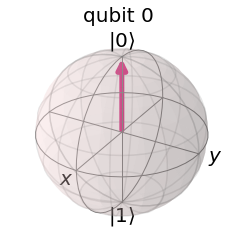

In [6]:
from qiskit.visualization import plot_bloch_multivector

def norm_state(arr): 
    '''
    Function that takes in an array of numbers and outputs a normalized array
    An array in python is writted down as [a,b,c,...] where a, b, and c are numbers
    May take in any length array, but for qubits we should use len(arr) = 2
    '''
    mag = np.sqrt(np.sum(np.array([abs(i)**2 for i in arr])))
    return np.array(arr)/mag
    #print(arr,mag)


single_qubit_demo = qis.QuantumCircuit(1)
initial_state = norm_state([1,0]) #Call the norm_state function defined above to ensure or statevector is normalized
single_qubit_demo.initialize(initial_state,[0])

backend = qis.BasicAer.get_backend('statevector_simulator') 
result = qis.execute(single_qubit_demo, backend).result()
psi  = result.get_statevector(single_qubit_demo)

#single_qubit_demo.draw()
plot_bloch_multivector(psi)

## Observables

While we write down a state of a quantum system as a state vector, never actually directly measure the state of the system. Instead, we measure some physical aspect of the system (such as the momentum of an electron), which we call an __observable__. In quantum mechanics, we represent observables as __linear operators__ which act on our state vector and maps it to another state vector $$\mathbf{A}|x\rangle = |y\rangle$$ For finite dimensional quantum systems with dimension $d$ (such as our qubit, with a Hilbert space $d = 2$), observables take the form of $d\times d$ matrices. Additionally, observables are __Hermitian__, or self adjoint: $$(\mathbf{A}|\phi\rangle)^\dagger|\psi\rangle = \langle\phi|\mathbf{A}^\dagger|\psi\rangle= |\phi\rangle^\dagger(\mathbf{A}|\psi\rangle) = \langle\phi|\mathbf{A}|\psi\rangle$$

or, in more amenable terms, $\mathbf{A}^\dagger = \mathbf{A}$. For a matrix operator, the hermitian conjugate is the complex conjugate of the transpose of the matrix: $\mathbf{A}^\dagger = (\mathbf{A}^T)^*$

The __eigenvectors__ $|a_i\rangle$ of an operator are vectors that satisfy $\mathbf{A}|a_i\rangle = a_i|a_i\rangle$ where $a_i$ is a number: the __eigenvalue__ of the eigenvector. Hermitian operators have two nice features:

- They have real eigenvalues (which, we'll see, ensures that we never measure an imaginary observable!)
- Their eigenvectors for a complete, orthonormal set.

These two facts allow us to express a hermitian operator $\mathbf{A}$ with eigenvectors $|a_i\rangle$ and corresponding eigenvalues $a_i$ in the following form: $$\mathbf{A} = \sum_i a_i |a_i\rangle\langle a_i|$$ where $|a_i\rangle\langle a_i|$ is the __outer product__ of $|a_i\rangle$ with itself. This is more or less a statement that $\mathbf{A}$ can be diagonalized.

If you're not familiar with the concept of an outer product, don't worry! Qiskit provides a bit of code to make an outer product out of two vectors. $\color{red}{\text{Play with the block of code below}}$: what is the result of multiplying a basis vector with itself? A basis vector with another basis vector? $\color{red}{\text{Can you build an arbitrary matrix out of a sum of outer products}}$, i.e. $\mathbf{A} = \sum_{ij}|i\rangle\langle j|$? Convince yourself that writing the matrix the form above (sometimes called __spectral decomposition__) is equivalent to diagonalizing the matrix.

In [8]:
import qiskit.tools.qi.qi as qi
#print(dir(qi))
state_vec_1 = [1,0]
state_vec_2 = [1,0]
matrix = qi.outer(state_vec_1,state_vec_2)
print(matrix)




[[1 0]
 [0 0]]


## Measurement

In order to get useful information out of a quantum computer, we have to measure an observable of qubits! A great deal of the weirdness of quantum mechanics is imbedded in the fact that while a quantum state may be in an arbitrary superposition state, when we measure a quantum state, *we always find it in an eigenstate of the measured observable.* To make this statement more concrete, let's once again turn to a single qubit. 

When measuring the state of a qubit, the observable we choose to measure can be summed up as "is the qubit in $|0\rangle$ or $|1\rangle$?" From the discussion above, we know we need an operator that is diagonal in the computational basis: we need an operator who's eigenvectors are $|0\rangle$ and $|1\rangle$.  The default operator to choose is the Pauli-Z matrix $$\sigma_Z = Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = |0\rangle\langle0| - |1\rangle\langle 1|$$ which is Hermitian as we demanded.

Since when we measure $\sigma_z$ we're asking "is the qubit in $|0\rangle$ or $|1\rangle$?", the result of the measurement of our *quantum bit* is a *classical bit*. In fact, while we manipulate quantum information to do a quantum computation, at the end of the day the output of that computation (what we measure) is always going to be classical.  We can measure the state of a qubit in a circuit by appending the ```measure``` command to a circuit. Note that the ```QuantumCircuit``` object now takes two inputs: we now have to specify both the number of *quantum bits* in the circuit and the number of *classical bits* to read these quantum bits out to. 

Play around with this concept in Qiskit: let's take our single qubit circuit we've become familiar with and tack a measurement onto it. Plug in some state vectors and look at the result of your measurement: I guarantee it'll always be $1$ or $0$! 

In [9]:
single_qubit = qis.QuantumCircuit(1,1) #create a one qubit circuit with a classical bit to read out to
initial_state = norm_state([1,1+2j])
single_qubit.initialize(initial_state,[0])
single_qubit.measure([0],[0]) #measure the 0th qubit and map it to the 0th classical bit


backend = qis.BasicAer.get_backend('qasm_simulator') # the device to run on (note that it's different this time)
result = qis.execute(single_qubit, backend, shots=1).result()
counts  = result.get_counts(single_qubit)
print(counts) 


#single_qubit.draw()

{'1': 1}


Of course, even though we only measure $|0\rangle$ or $|1\rangle$, the relative weights of $a$ and $b$ still have physical meaning. The outcome of a measurement of a state in a superposition is *probabilistic*: $a$ and $b$ are the __probability amplitudes__ of measuring the qubit in the $|0\rangle$ and $|1\rangle$ states respectively. More generally, if I measure of observable $\mathbf{A}$ of a quantum state with state vector $|\psi\rangle$, the probability of measuring $a_i$ (and finding the system in eigenstate $|a_i\rangle$) is

$$\langle\psi|a_i\rangle\langle a_i|\psi\rangle = |\langle a_i|\psi\rangle|^2$$ 

For example, the probability of finding the qubit in the state $|\psi\rangle = a|0\rangle + b|1\rangle$ in the $|0\rangle$ state is 

$$ (\langle0|a^* + \langle1|b^*) |0\rangle\langle0| (a|0\rangle + b|1\rangle) = |a|^2 \langle0|0\rangle^2 = |a|^2 $$ 

We can (and often do) partially reconstruct these probability amplitudes by preparing a quantum system and measuring the quantum system multiple times. Qiskit allows us to do this easily, and also has built in functions to visualize the results with ease. The block of code is more or less the same as the above code, except that it runs the simulation 1000 times and outputs a histogram of the results.

{'0': 966, '1': 34}


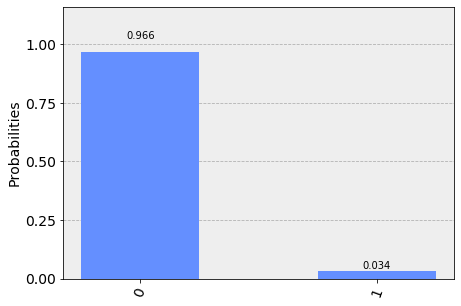

In [10]:


single_qubit = qis.QuantumCircuit(1,1) #create a one qubit circuit with a classical bit to read out to
initial_state = norm_state([1,0.2])
single_qubit.initialize(initial_state,[0])
single_qubit.measure([0],[0]) #measure the 0th qubit and map it to the 0th classical bit


backend = qis.BasicAer.get_backend('qasm_simulator') # the device to run on
result = qis.execute(single_qubit, backend, shots=1000).result() #run the circuit 1000x
counts  = result.get_counts(single_qubit)
print(counts)



from qiskit.visualization import plot_histogram
plot_histogram(counts) #plot a histogram of the results of the measurements 

Of course, this repeated measurement tells us nothing about the relative phase of $a$ and $b$ you chose. The process of reconstructing the entire quantum state vector is called __quantum state tomography__, and we may talk about it later.

It should be emphasized that, in the simulation above, we're not just measuring the state 1000 times: we're actually going through the whole process of initialization and measurement 1000 times. The reason we need to do this is that when we measure the state $|\psi\rangle$ and find it state $|a_i\rangle$, the state is __projected__ into $|a_i\rangle$: the our measurement actually changes the state of the qubit! Formally, the act of measuring $|\psi\rangle$ and finding eigenvalue $a_i$ projects the state into 

$$ |\psi\rangle \rightarrow \frac{\mathbf{P_i}|\psi\rangle}{(\langle\psi|\mathbf{P_i}|\psi\rangle)^{1/2}} $$

Were I've used the common shorthand of the __projector__ operator $\mathbf{P}_i = |a_i\rangle\langle a_i|$, the outer product of the corresponding eigenvector $|a_i\rangle$ with itself. The term in the denominator is simply a normalization: the numerator is what actually defines the state. If you're unfamiliar with projectors, it might be worth writing out what happens to my qubit when I measure my state $a|0\rangle + b|1\rangle$ and find it in $|0\rangle$.

Importantly, this means that if we do two successive measurements to a quantum system, we'll project the qubit into the state $|a_i\rangle$ during the first measurement, and then *always* measure system in the same state $|a_i\rangle$ in the second. The act of measurement destroys any superposition we once had! To verify this, we can tack a second measurement onto our single qubit circuit and run it a bunch of times: you'll find that sometimes you measure $0,0$, sometimes you measure $1,1$, but the results of the measurement are *never* different:

{'11': 476, '00': 524}


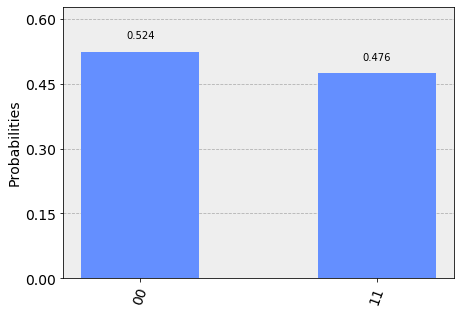

In [11]:
single_qubit = qis.QuantumCircuit(1,2) #create a one qubit circuit with TWO classical bits to read out to
initial_state = norm_state([1,1])
single_qubit.initialize(initial_state,[0])
single_qubit.measure([0],[0]) #measure the 0th qubit and map it to the 0th classical bit
single_qubit.measure([0],[1]) #measure the 0th qubit again and map it to the 1st classical bit

backend = qis.BasicAer.get_backend('qasm_simulator') # the device to run on
result = qis.execute(single_qubit, backend, shots=1000).result() #run the circuit 1000x
counts  = result.get_counts(single_qubit)
print(counts)


#single_qubit.draw()

plot_histogram(counts) #plot a histogram of results of the two measurements

## Deterministic Evolution

Of course, if we want to do a computation with a qubit, we'll have to do something to it before we measure it: we want it to change (evolve) as a function of time. This evolution happens according to the Schrödinger equation $$ i\hbar\frac{\partial|\psi(t)\rangle}{\partial t} = \hat{H}|\psi(t)\rangle$$ where $\hat{H}$ is the Hamiltonian operator. Since the Shrödinger equation is a linear differential equation, we can "solve"  ease: $$|\psi(t)\rangle = e^{\frac{-i\hat{H} t}{\hbar}}|\psi(0)\rangle = \mathbf{U}(t)|\psi(0)\rangle$$ 

where we've written down the scary looking term with an operator in the exponent as a (linear) operator $\mathbf{U}(t)$. What can we say about this operator?  Well, for a qubit, this is a linear operator that takes a two dimensional state vector at time to a new two dimensional state vector: just like the measurement operator $\mathbf{A}$ we talked about, it's a matrix! Formally, it's a 2 x 2 matrix (that may also be complex): $\mathbf{U}(t) \in \mathbb{C}^{n\text{x}n}$.

As a side note, $\mathbf{U}(t)$ is a __unitary operator__: $\mathbf{U}^{\dagger}\mathbf{U} = \mathbf{UU}^{\dagger} = 1$. The unitarity of the time evolution operator $\mathbf{U}(t)$ is required to enforce our normalization constraint. If this isn't clear to you, $\color{red}{\text{think about what we specified } \langle\psi(t)|\psi(t)\rangle \text{ should be equal to.}}$ Should this quantity change as a function of time?

In principal, if we know the Hamiltonian, we can calculate $\mathbf{U}(t)$ and thus how the qubit state vector changes as a function of time. All we need to do is manipulate the Hamiltonian in such a way that our qubits perform a computation. 

 

## The circuit model: a very brief intro

In reality, trying to write down a Hamiltonian that does a complex calculation for a large number of qubits would be a nightmare. To simplify the matter, we'll break up the time evolution of the qubit into bite-sized __gates__ that we can reliably execute. Since, at the end of the day, these gates represent evolution of the qubit over small chunks of time, we write them down as unitary matrices. We'll leave the fine details of the Hamiltonian required to execute these gates to the experimentalists building our quantum computer: we'll assume for now that we can apply a gate described by the (unitary) matrix $\mathbf{U}$ to our qubit, which will evolve the state vector of the qubit from $|\psi\rangle \rightarrow \mathbf{U}|\psi\rangle$.

We'll learn about a bunch of convenient gates in the future, but for now let's focus on one very important one: the Hadamard. $$ \mathbf{H} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$ The Hadamard takes a eigenstate in the computational basis and puts it into an equal superposition state. On a circuit, the Hadamard is generally written down as a box with an $H$ in it.

The circuit below looks more like what a real quantum algorithm will look like. Qiskit provides a method ```.draw()``` to visualize quantum circuits, so we'll use that at the end to get a picture of our circuit to help us understand what's going on. We start off (on the left) with all our qubits initialized to the $|0\rangle$ state. As we move forward in time (right along the circuit) we apply some gates (which we visualize with labeled boxes) to our qubits (which "live" on the horizontal lines.) At the end of the day, once we've performed our computation, we measure some/all of the qubits to get the results of the computation. 

Right now, The only gate currently being applied is a Hadamard on the $0^{th}$ qubit, which I added in with the command ```circ.h(0)```. You can modify the circuit by adding more gates to your qubits, or by adding more qubits/classical readout bits to the circuit. Common gates include the Pauli matrices, which you can add by to the $n^{th}$ qubit with (say, for $\sigma_x$) ```circ.x(n)``` 


In [12]:
circ = qis.QuantumCircuit(2,2) #create a 2 qubits circuit with 2 classical bits to read out to

circ.h(0) #add a Hadamard to the 0th qubit 
circ.t(0)
circ.measure([0,1],[0,1]) #measure the 0th and 1st qubits and map the results to the 0th and 1st classical bits

backend = qis.BasicAer.get_backend('qasm_simulator') # the device to run on
result = qis.execute(circ, backend, shots=1000).result() #run the circuit 1000x
counts  = result.get_counts(circ)
print(counts)


circ.draw()

# To get a somewhat fancier picture, you may feed the draw function an extra argumet: circ.draw(output = 'mpl')
# This makes things look prettier, but be aware that it condenses all of the classical bits onto one line


#plot_histogram(counts) #plot a histogram of results of the two measurements

{'01': 472, '00': 528}


$\color{red}{\text{Some exercises you should do to familiarize yourself with the gate model:}}$

- What happens when I apply two back to back Hadamards to the same qubit? Since the Hadamard is hermitian and unitary, what should we expect?

- What happens when I apply a Pauli X gate to a qubit? For those of you familiar with classical logic, what classical logic gate is the Pauli X gate equivalant to?

- What happens to a qubit when I apply successive Hadamard - Pauli X - Hadamard? What does that tell me about the state of the qubit after I apply the first Hadamard?

A complete list of gates you can implement in your circuit (and instructions on how to implement them) can be found [here](https://quantum-computing.ibm.com/support/guides/gate-overview?section=5d00d964853ef8003c6d6820#u1-gate). We'll talk more about some of them later, but you can start putting them into your circuit now to see what they do!